In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

# Data Preprocessing

## Dealing with Missing Value and Duplicates

In [5]:
#check if there is an empty column
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#check if there are duplicates
df.duplicated().sum()

0

The dataset is good enough because there are no missing values and duplicates

## Statistical Summary

In [7]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
#Rename label Exited
df.rename(columns = {'Exited':'Churn'}, inplace = True)

In [13]:
#delete unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [14]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# check statisctical description
df.describe(include = 'object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


# Explonatory Data Analysis

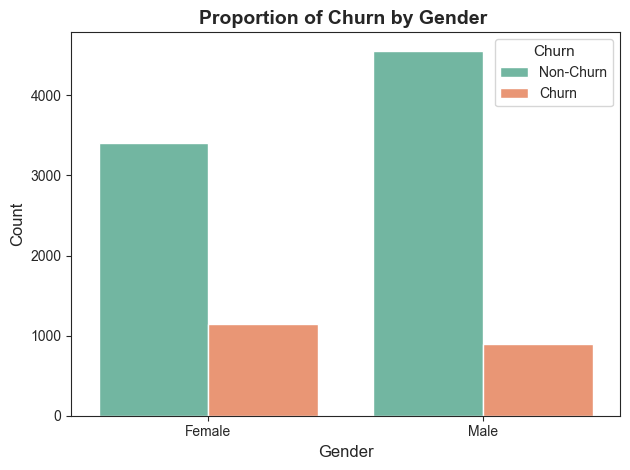

In [16]:
sns.set_style("ticks")
ax = sns.countplot(x='Gender', hue='Churn', data=df, palette='Set2')
plt.title("Proportion of Churn by Gender ", fontsize=14, fontweight='bold')
ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-Churn', 'Churn'], title="Churn", title_fontsize=11)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10968\2032520270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col])


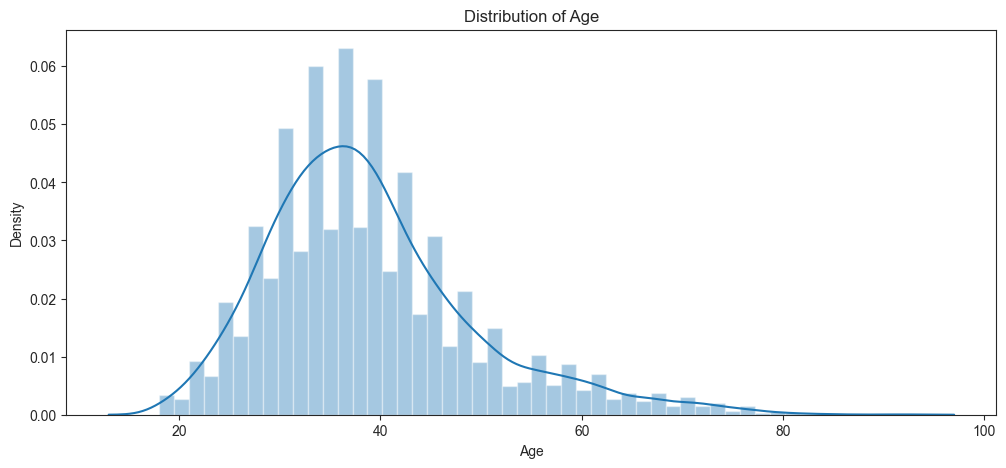

C:\Users\User\AppData\Local\Temp\ipykernel_10968\2032520270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col])


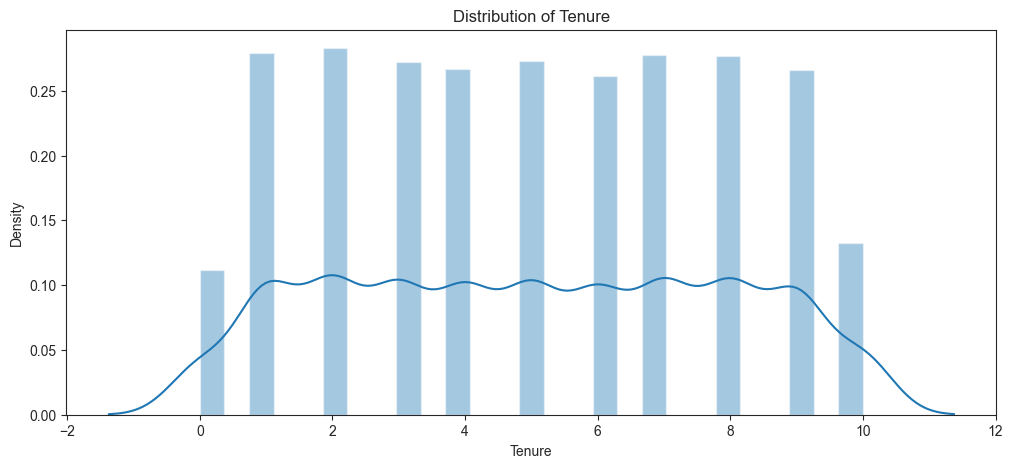

C:\Users\User\AppData\Local\Temp\ipykernel_10968\2032520270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col])


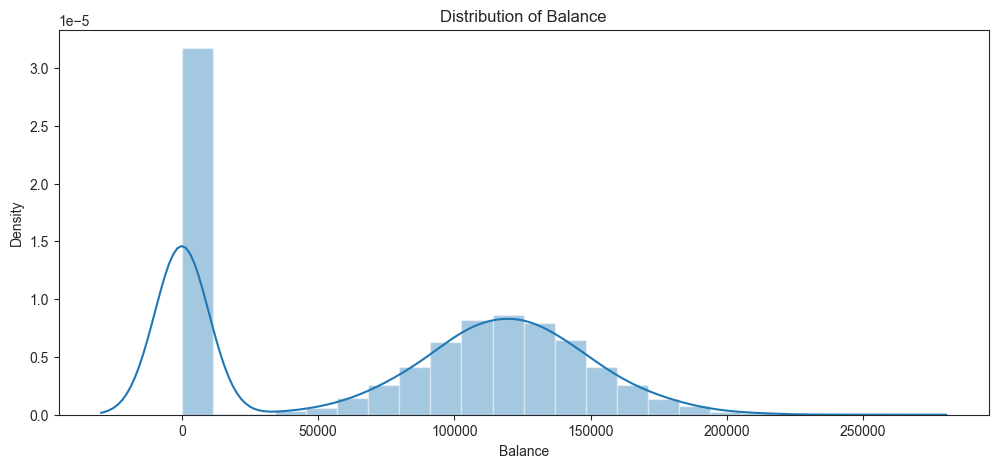

C:\Users\User\AppData\Local\Temp\ipykernel_10968\2032520270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col])


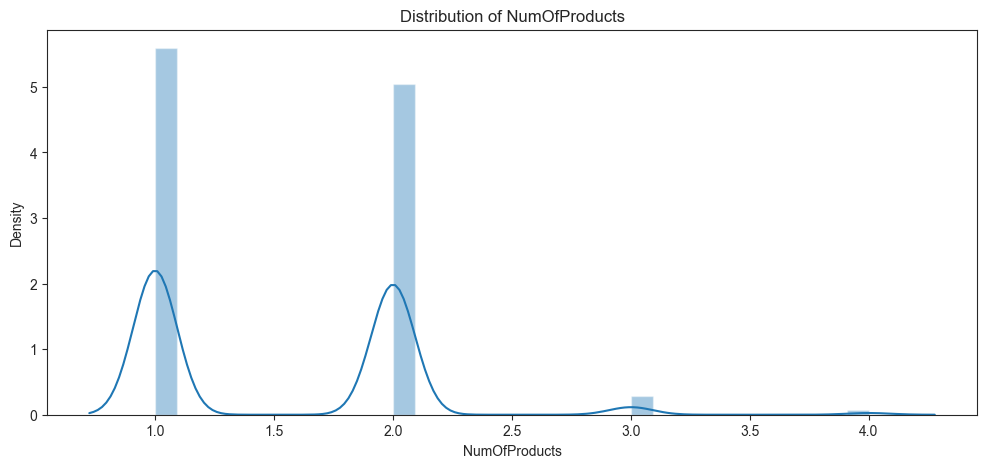

C:\Users\User\AppData\Local\Temp\ipykernel_10968\2032520270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col])


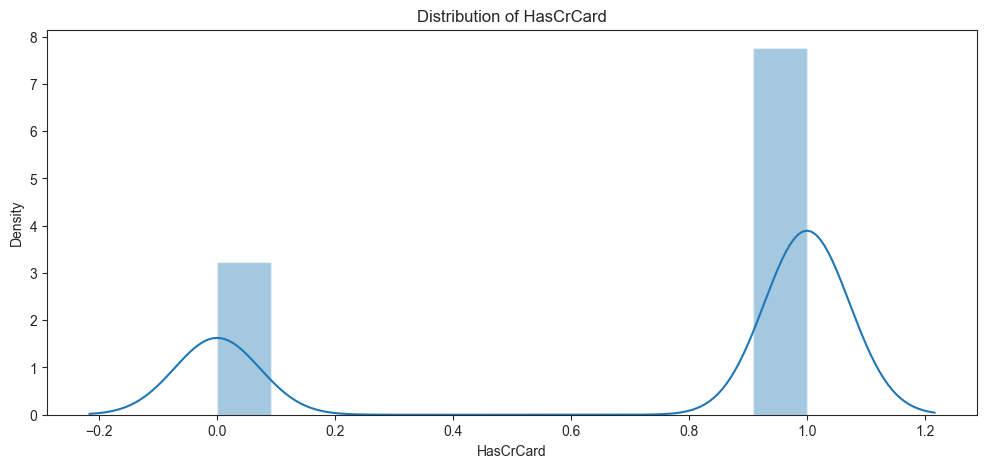

C:\Users\User\AppData\Local\Temp\ipykernel_10968\2032520270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col])


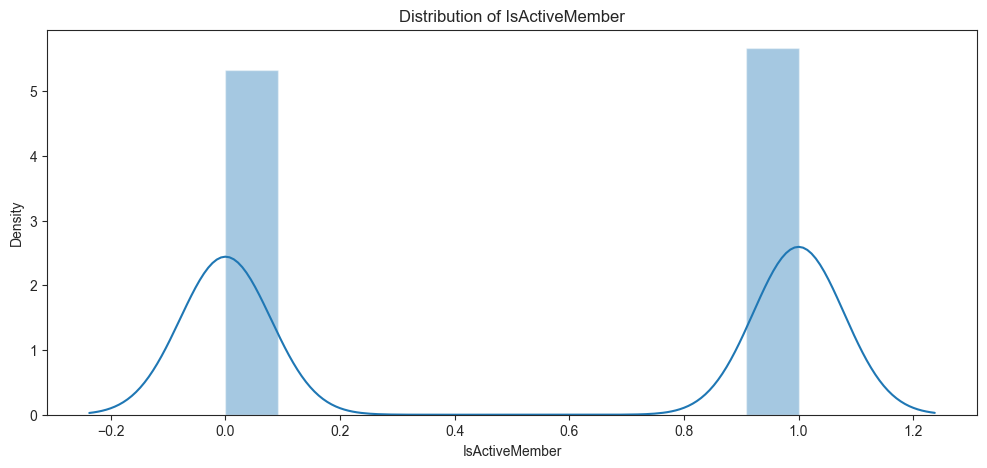

C:\Users\User\AppData\Local\Temp\ipykernel_10968\2032520270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col])


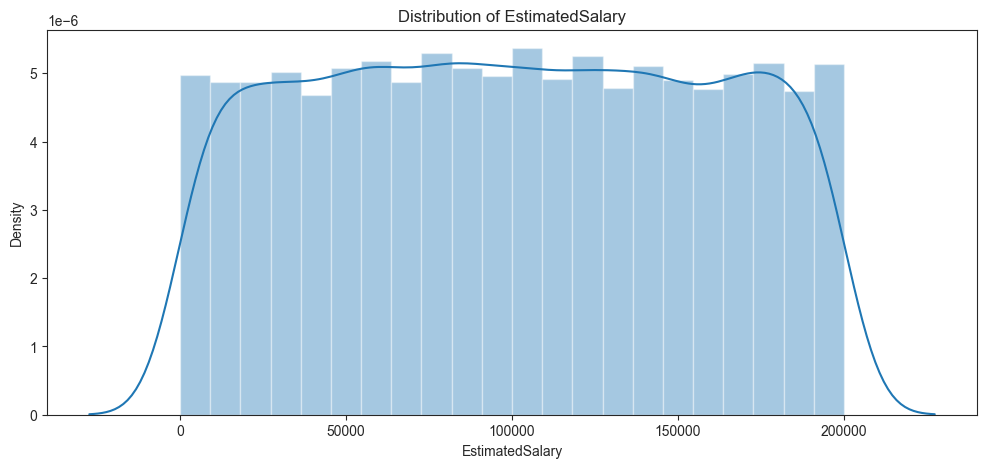

C:\Users\User\AppData\Local\Temp\ipykernel_10968\2032520270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col])


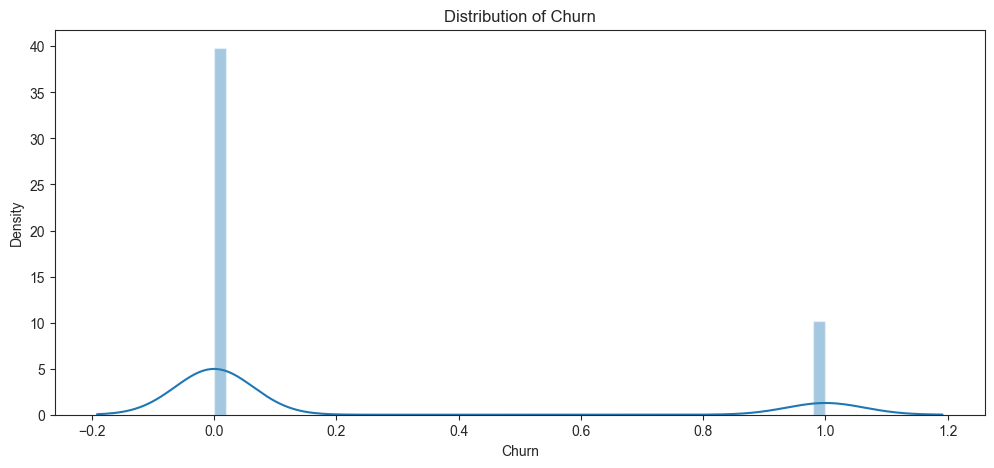

In [17]:
numeric = df.select_dtypes(include='number')
for col in list(numeric)[1:]:
    plt.figure(figsize=(12, 5))
    plt.title(f"Distribution of {col}")
    ax = sns.distplot(df[col])
    plt.show()

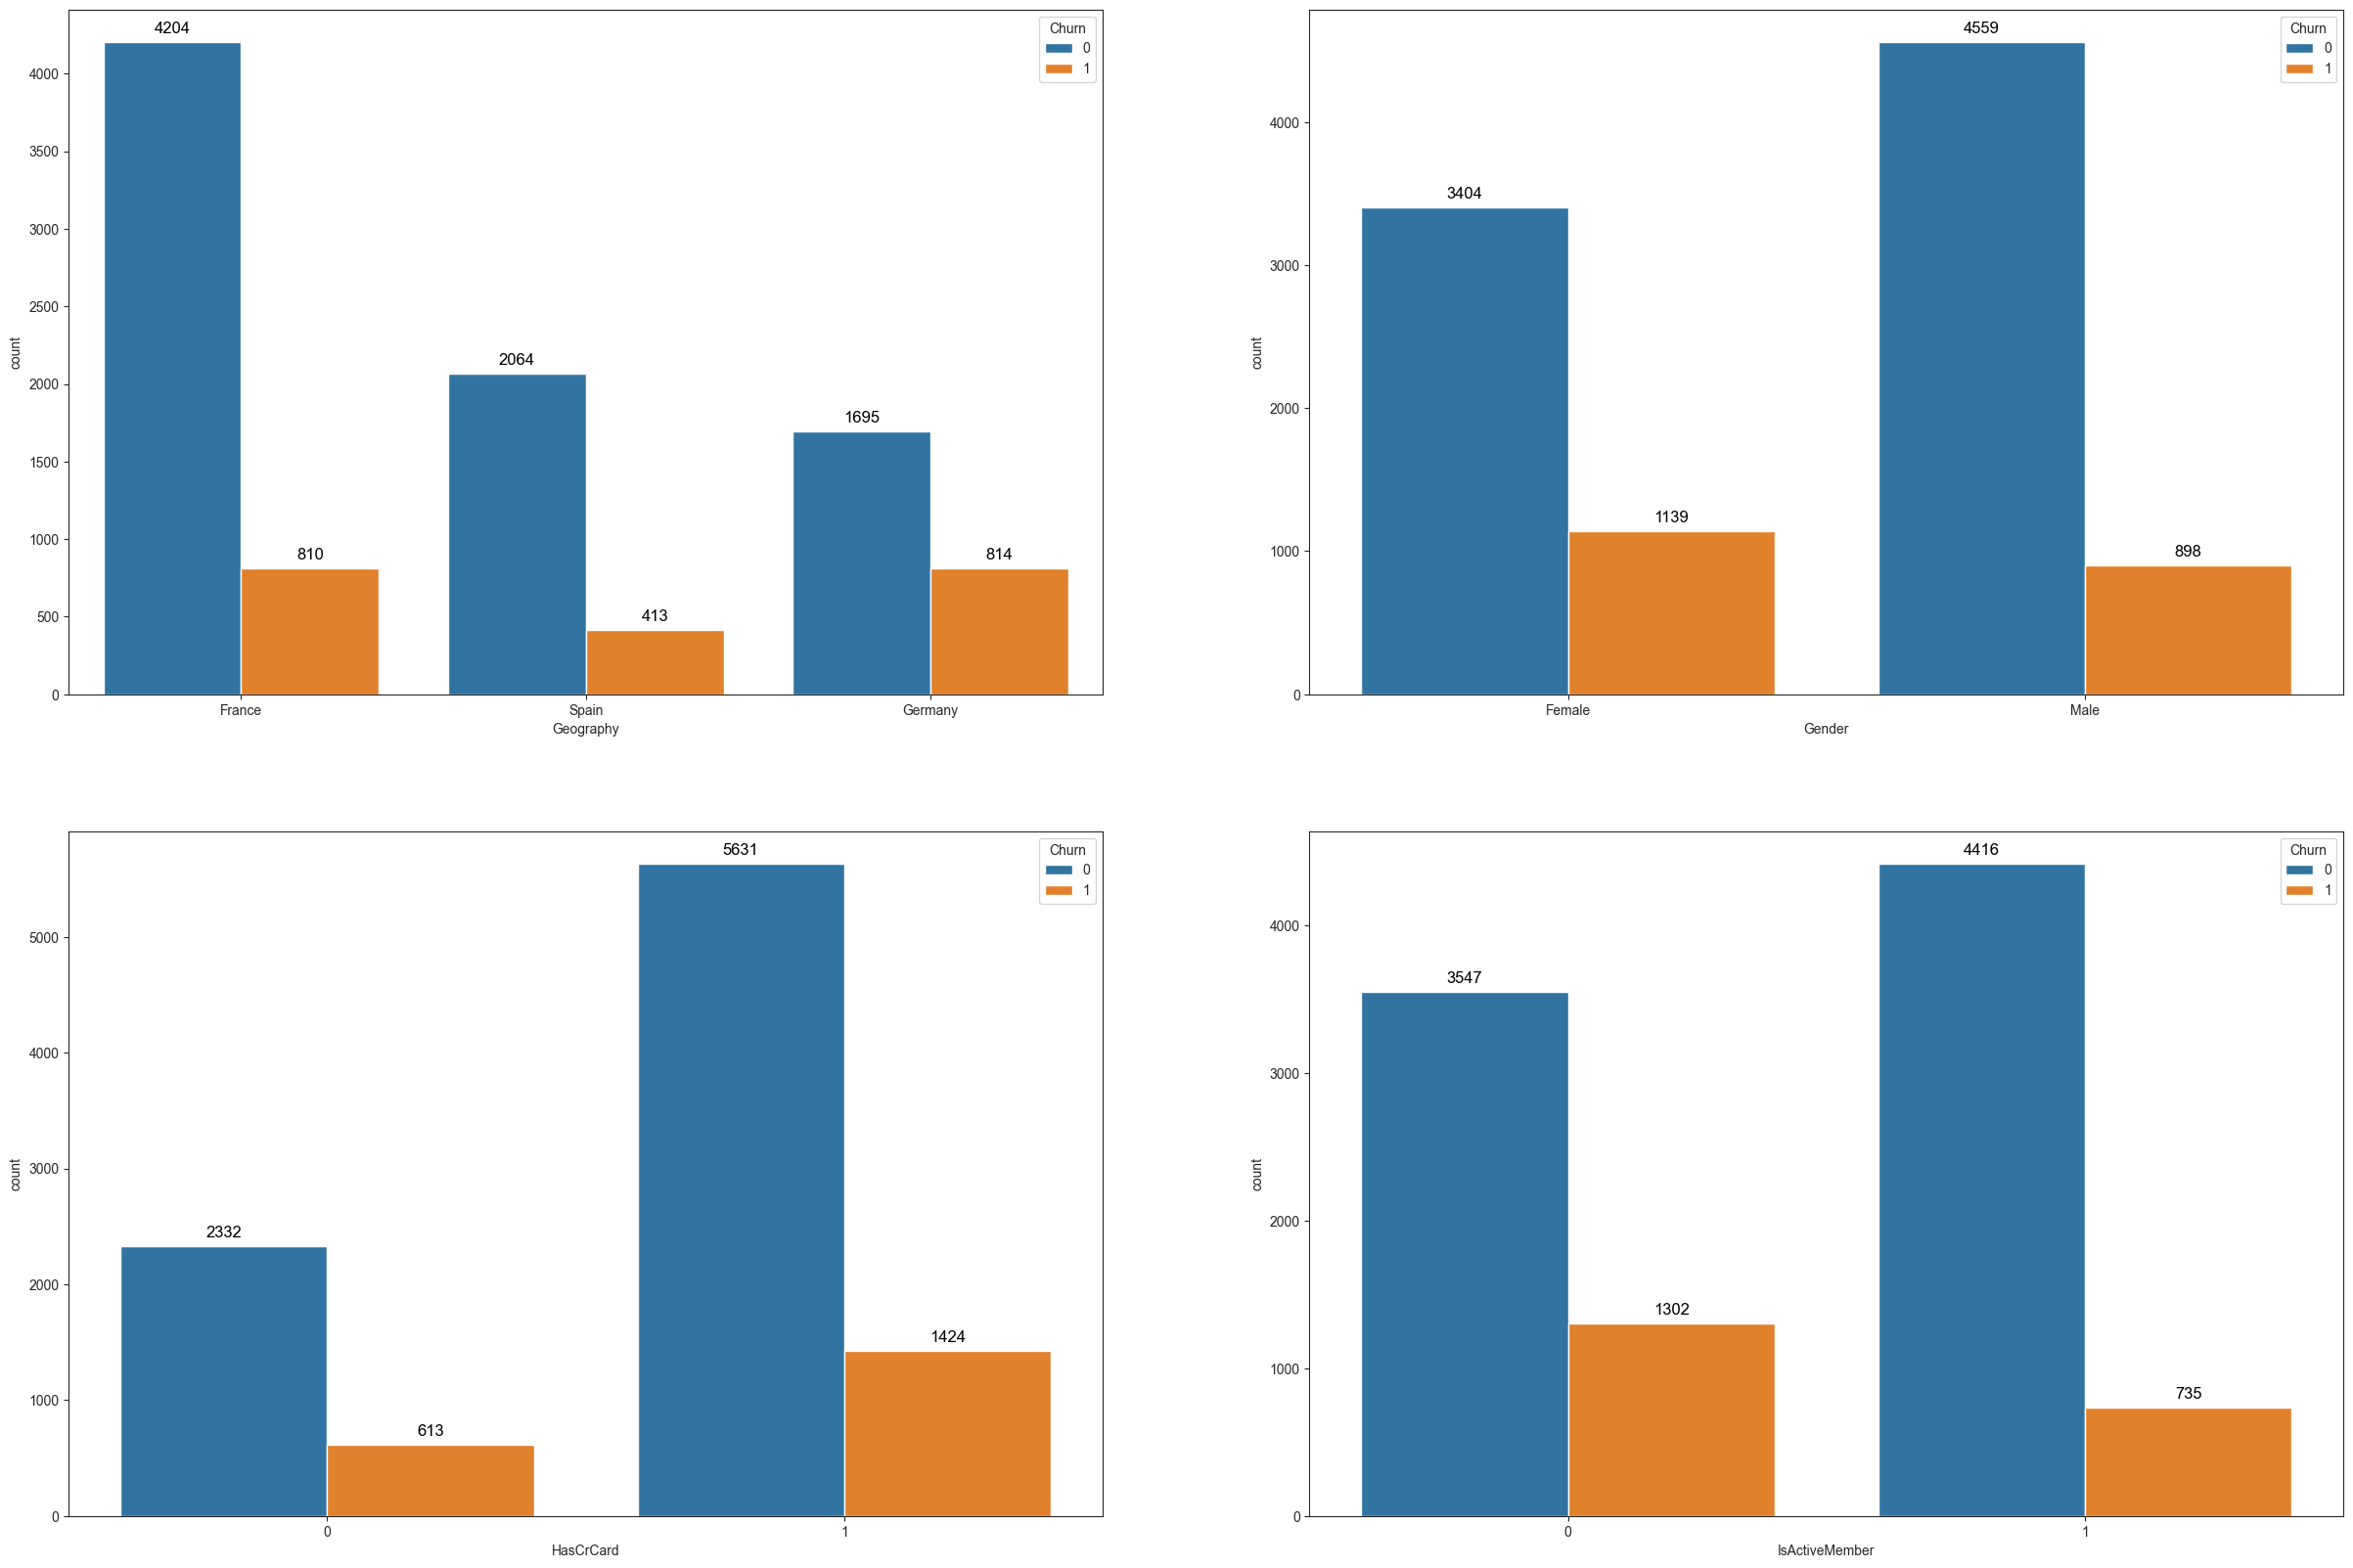

In [18]:
fig, axarr = plt.subplots(2, 2, figsize = (30,20))
sns.countplot (x='Geography', hue = 'Churn', data = df, ax=axarr[0][0])
sns.countplot (x='Gender', hue = 'Churn', data = df, ax=axarr[0][1])
sns.countplot (x='HasCrCard', hue = 'Churn', data = df, ax=axarr[1][0])
sns.countplot (x='IsActiveMember', hue = 'Churn', data = df, ax=axarr[1][1])

for ax in axarr.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')

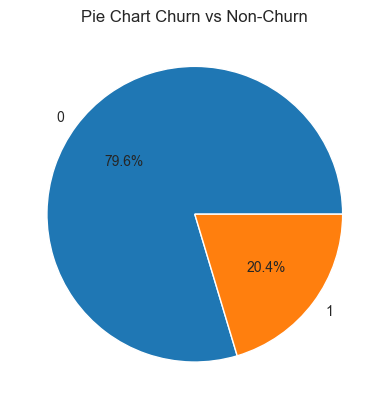

In [19]:
# Menghitung jumlah churn dan non-churn
churn_count = df['Churn'].value_counts()

plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%')
plt.title("Pie Chart Churn vs Non-Churn")

plt.show()

<Axes: xlabel='Churn', ylabel='EstimatedSalary'>

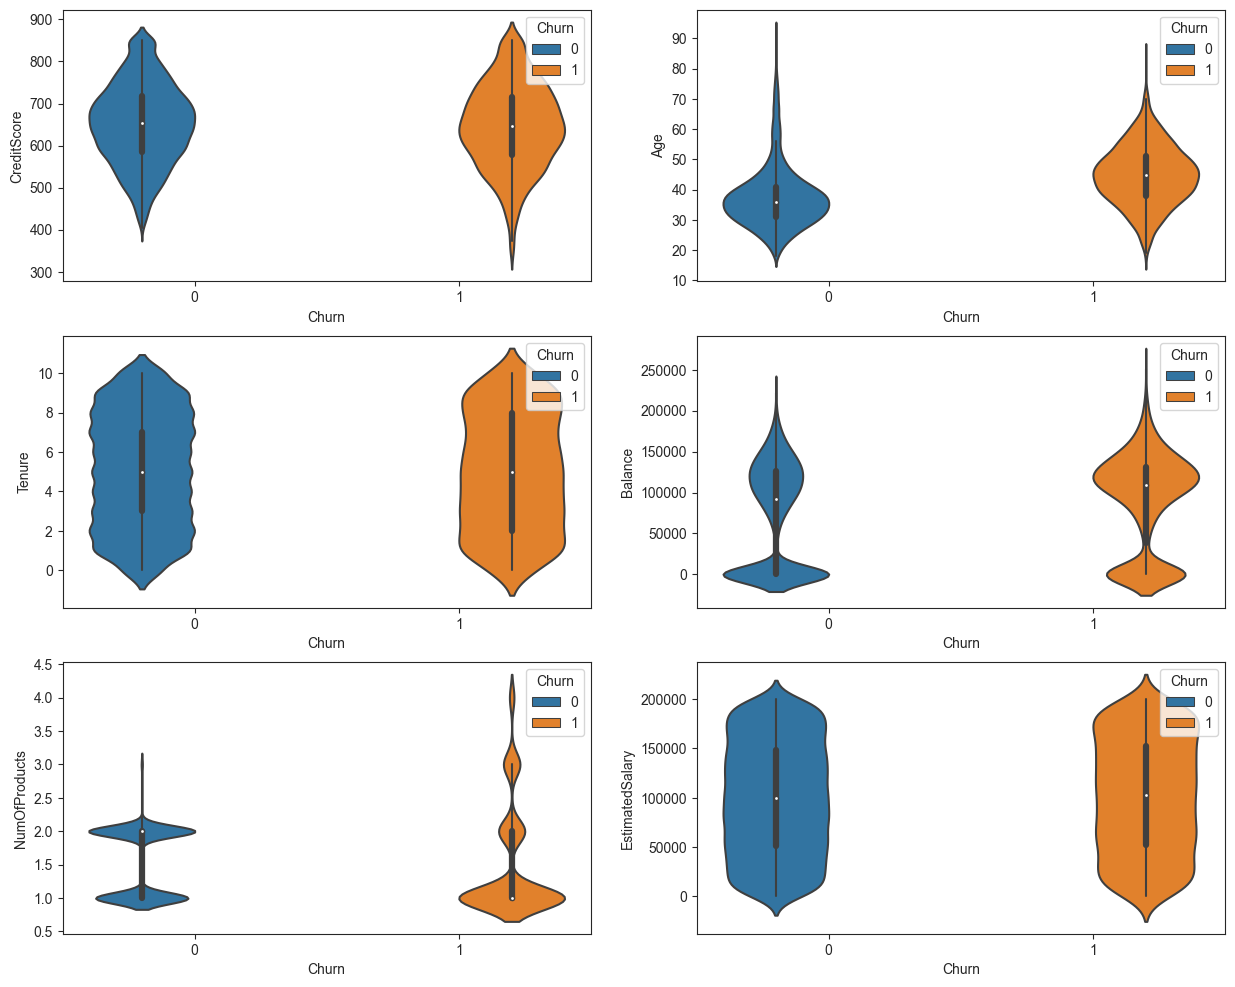

In [20]:
#see the distribution of data
fig, axarr = plt.subplots(3,2, figsize=(15,12))
sns.violinplot(y='CreditScore', x = 'Churn', hue = 'Churn', data = df, ax=axarr[0][0])
sns.violinplot(y='Age', x = 'Churn', hue = 'Churn', data = df, ax=axarr[0][1])
sns.violinplot(y='Tenure', x = 'Churn', hue = 'Churn', data = df, ax=axarr[1][0])
sns.violinplot(y='Balance', x = 'Churn', hue = 'Churn', data = df, ax=axarr[1][1])
sns.violinplot(y='NumOfProducts', x = 'Churn', hue = 'Churn', data = df, ax=axarr[2][0])
sns.violinplot(y='EstimatedSalary', x = 'Churn', hue = 'Churn', data = df, ax=axarr[2][1])

# Correlation Matrix

C:\Users\User\AppData\Local\Temp\ipykernel_10968\2896040365.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


<Axes: >

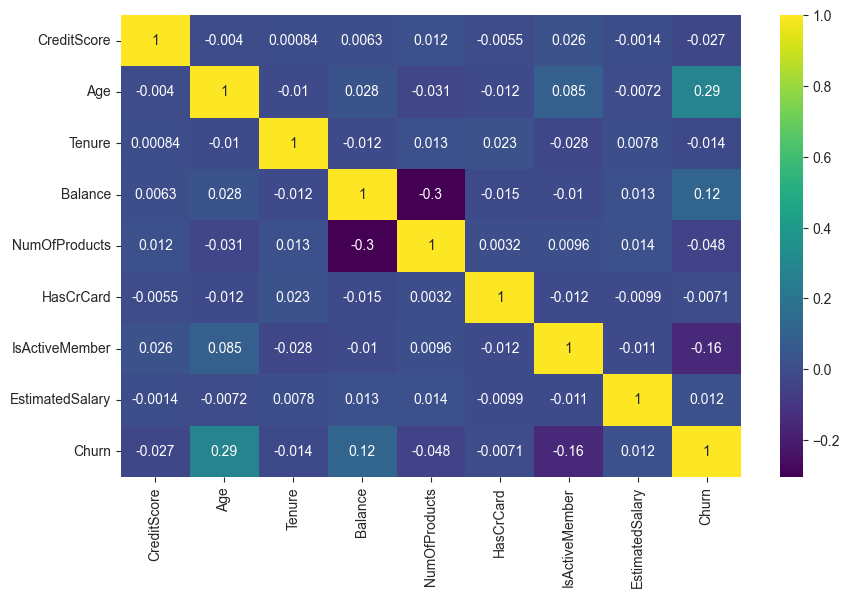

In [21]:
#Churn Correlation Matrix
cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot = True, cmap = 'viridis')

<Axes: xlabel='Churn', ylabel='count'>

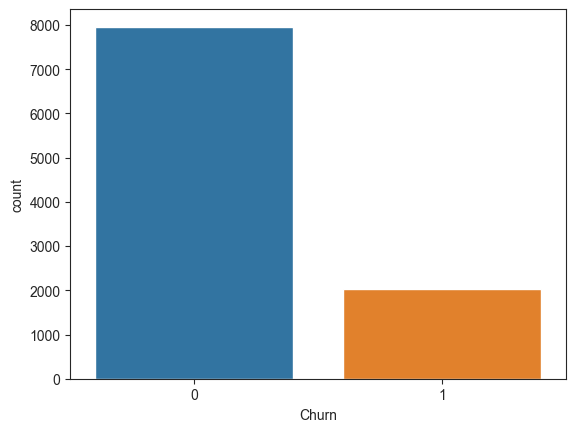

In [22]:
sns.countplot(x='Churn', data = df)

# Feature Enginering

In [23]:
df_fe = df.copy()

In [24]:
#Balace Salary Ratio
df_fe['BalanceSalaryRatio'] = df_fe["Balance"]/df_fe["EstimatedSalary"]

#Given that tenure is a 'function' of age, we introduce a variable to standarize tenure
df_fe['TenureByAge'] = df_fe['Tenure']/(df_fe["Age"])

#Credit score given age to take into account credit behaviour
df_fe['CreditScoreGivenAge'] = df_fe["CreditScore"]

#Measures how much portion of income used to pay off debt.
df_fe['DebtToIncomeRatio'] = (df_fe["Balance"]/df_fe["EstimatedSalary"])*100

In [25]:
# Merubah nilai 'gender' menjadi 0 untuk 'Female' dan 1 untuk 'Male'
df_fe['Gender'] = df_fe['Gender'].replace({'Female': 0, 'Male': 1})

df_fe = df_fe.drop('Geography', axis=1)

In [26]:
df_fe.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,DebtToIncomeRatio
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,619,0.000000
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,608,74.467690
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,502,140.137453
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,699,0.000000
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,850,158.705505


In [27]:
df_fe.isnull().sum()

CreditScore            0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Churn                  0
BalanceSalaryRatio     0
TenureByAge            0
CreditScoreGivenAge    0
DebtToIncomeRatio      0
dtype: int64

In [28]:
df_fe.duplicated().sum()

0

In [29]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditScore          10000 non-null  int64  
 1   Gender               10000 non-null  int64  
 2   Age                  10000 non-null  int64  
 3   Tenure               10000 non-null  int64  
 4   Balance              10000 non-null  float64
 5   NumOfProducts        10000 non-null  int64  
 6   HasCrCard            10000 non-null  int64  
 7   IsActiveMember       10000 non-null  int64  
 8   EstimatedSalary      10000 non-null  float64
 9   Churn                10000 non-null  int64  
 10  BalanceSalaryRatio   10000 non-null  float64
 11  TenureByAge          10000 non-null  float64
 12  CreditScoreGivenAge  10000 non-null  int64  
 13  DebtToIncomeRatio    10000 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 1.1 MB


# Model

In [30]:
from sklearn.model_selection import train_test_split

#Spliting Train and Test data
X = df_fe.drop(columns = ["Churn"]).copy()
y = df_fe["Churn"].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,
                                                    random_state = 42)

In [31]:
print(len(X_train))
print(len(X_test))

7500
2500


In [32]:
#Fit Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Scoring Function
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


## Fit Best Model

In [33]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## Review Best Model Fit Accuracy

In [36]:
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2003
           1       0.48      0.08      0.14       497

    accuracy                           0.80      2500
   macro avg       0.65      0.53      0.52      2500
weighted avg       0.75      0.80      0.74      2500



In [37]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2003
           1       0.26      0.09      0.14       497

    accuracy                           0.77      2500
   macro avg       0.53      0.51      0.50      2500
weighted avg       0.70      0.77      0.72      2500



In [38]:
y_pred_rf= log.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2003
           1       0.48      0.08      0.14       497

    accuracy                           0.80      2500
   macro avg       0.65      0.53      0.52      2500
weighted avg       0.75      0.80      0.74      2500



In [39]:
def get_auc_scores(y_actual, y_pred, y_proba):
    auc_score = roc_auc_score(y_actual, y_pred);
    fpr_df, tpr_df, _ = roc_curve(y_actual, y_proba);
    return (auc_score, fpr_df, tpr_df)

In [40]:
auc_log, fpr_log, tpr_log = get_auc_scores(y,
                                           log.predict(X),
                                           log.predict_proba(X)[:,1])
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y,
                                           knn.predict(X),
                                           knn.predict_proba(X)[:,1])
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y,
                                           rf.predict(X),
                                           rf.predict_proba(X)[:,1])

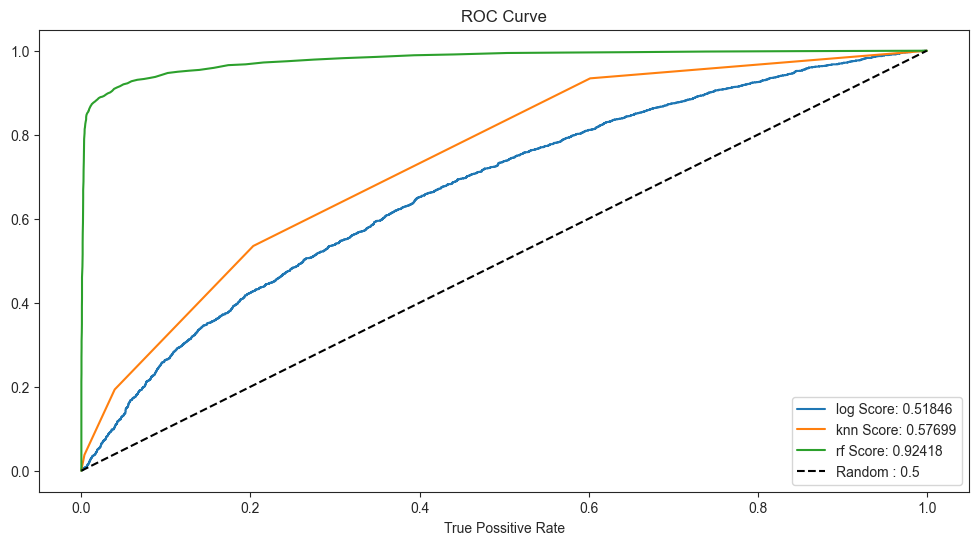

In [41]:
plt.figure(figsize = (12, 6), linewidth = 1)
plt.plot(fpr_log, tpr_log, label = 'log Score: ' + str(round(auc_log, 5)) )
plt.plot(fpr_knn, tpr_knn, label = 'knn Score: ' + str(round(auc_knn, 5)) )
plt.plot(fpr_rf, tpr_rf, label = 'rf Score: ' + str(round(auc_rf, 5)) )
plt.plot([0,1], [0,1], 'k--', label = 'Random : 0.5')
plt.xlabel('False Possitive Rate')
plt.xlabel('True Possitive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

## Resampling to Handle Imbalance Data

In [43]:
y_train.value_counts()

0    5960
1    1540
Name: Churn, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [50]:
#fit random forest classifier
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [51]:
y_pred_smote =rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      2003
           1       0.51      0.58      0.54       497

    accuracy                           0.80      2500
   macro avg       0.70      0.72      0.71      2500
weighted avg       0.82      0.80      0.81      2500



# Feature Importance

<BarContainer object of 13 artists>

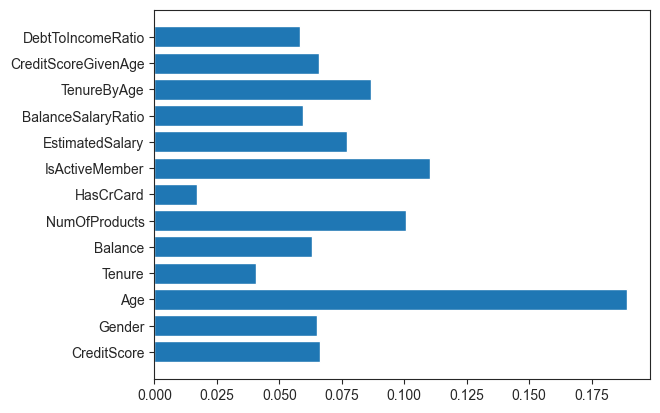

In [52]:
fi = rf_smote.feature_importances_
col = X_train.columns
plt.barh(col,fi)

In [53]:
df.groupby("Churn") [ "Age"]. mean()

Churn
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [56]:
pd.crosstab(df["IsActiveMember"],df["Churn"])

Churn,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


# Thank You